## Nikhil Lamba
## 21901305

In [ ]:
%cd D:\Satbir_Sir_dataset\Nikhil_codes

D:\Satbir_Sir_dataset\Nikhil_codes


In [ ]:
import cv2
import sys


(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')

if __name__ == '__main__' :

    # Set up tracker.
    # Instead of CSRT, you can also use

    tracker_types = ['BOOSTING', 'MIL','KCF', 'TLD', 'MEDIANFLOW', 'GOTURN', 'MOSSE', 'CSRT']
    tracker_type = tracker_types[0]

    if int(minor_ver) < 3:
        tracker = cv2.Tracker_create(tracker_type)
    else:
        if tracker_type == 'BOOSTING':
            tracker = cv2.legacy.TrackerBoosting_create()
        elif tracker_type == 'MIL':
            tracker = cv2.TrackerMIL_create()
        elif tracker_type == 'KCF':
            tracker = cv2.legacy.TrackerKCF_create()
        elif tracker_type == 'TLD':
            tracker = cv2.legacy.TrackerTLD_create()
        elif tracker_type == 'MEDIANFLOW':
            tracker = cv2.legacy.TrackerMedianFlow_create()
        elif tracker_type == 'GOTURN':
             tracker = cv2.legacy.TrackerGOTURN_create()
        elif tracker_type == 'MOSSE':
            tracker = cv2.legacy.TrackerMOSSE_create()
        elif tracker_type == "CSRT":
            tracker = cv2.TrackerCSRT_create()


video = cv2.VideoCapture("project.avi")
out = cv2.VideoWriter('output_BOOSTING_rgb.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (448,324))
#video = cv2.VideoCapture(0) # for using CAM

# Exit if video not opened.
if not video.isOpened():
  print("Could not open video")
  sys.exit()

# Read first frame.
ok, frame = video.read()
if not ok:
  print ('Cannot read video file')
  sys.exit()

bbox = (147,195,17,50)

# Uncomment the line below to select a different bounding box
####bbox = cv2.selectROI(frame, False)

# Initialize tracker with first frame and bounding box
ok = tracker.init(frame, bbox)
list1=[]
list2=[]
bbox_0=[]
bbox_1=[]
bbox_2=[]
bbox_3=[]
while True:
     # Read a new frame
     ok, frame = video.read()
     if not ok:
         break

     # Start timer
     timer = cv2.getTickCount()

     # Update tracker
     ok, bbox = tracker.update(frame)

     # Calculate Frames per second (FPS)
     fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer);

     # Draw bounding box
     if ok:
         # Tracking success
         p1 = (int(bbox[0]), int(bbox[1]))
         p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
         print(p1,p2)
         list1.append(p1)
         list2.append(p2)
         bbox_0.append(bbox[0])
         bbox_1.append(bbox[1])
         bbox_2.append(bbox[0]+bbox[2])
         bbox_3.append(bbox[1]+bbox[3])
         cv2.rectangle(frame, p1, p2, (255,0,0), 2, 1)
     else :
         # Tracking failure
         cv2.putText(frame, "Tracking failure detected", (100,80), cv2.FONT_HERSHEY_SIMPLEX, 0.75,(0,0,255),2)

     # # Display tracker type on frame
     # cv2.putText(frame, tracker_type + " Tracker", (100,20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50),2);
     #
     # # Display FPS on frame
     # cv2.putText(frame, "FPS : " + str(int(fps)), (100,50), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50), 2);
     # # Display result
     imS = cv2.resize(frame, (448,324))                    # Resize image
     out.write(frame)
     cv2.imshow("Tracking", imS)

     # Exit if ESC pressed
     if cv2.waitKey(1) & 0xFF == ord('q'): # if press SPACE bar
         break

video.release()
out.release()
cv2.destroyAllWindows()


In [ ]:
bbox_3

In [ ]:
#dataframe containing values regarding tracker_MIL_RGB
import pandas as pd
#from pandas import DataFrame
df_MIL_RGB = pd.DataFrame(list(zip(bbox_0,bbox_1,bbox_2,bbox_3)), columns =['bbox_0', 'bbox_1','bbox_2','bbox_3']) 
#print(df_MIL_RGB) 
# df=DataFrame({'bbox0' : bbox_0, 'bbox1': bbox_1, 'bbox2': bbox_2, 'bbox3': bbox_3})

# print(df)

In [ ]:
df_MIL_RGB

,bbox_0,bbox_1,bbox_2,bbox_3
0,144,194,161,244
1,141,192,158,242
2,138,191,155,241
3,136,188,153,238
4,135,188,152,237
...,...,...,...,...
145,138,183,155,233
146,140,186,157,236
147,144,185,161,235
148,146,184,163,234


In [ ]:
df_GT__pre=pd.read_csv('GT.txt',sep="	",header=None)

In [ ]:
df_GT=df_GT__pre.iloc[:,[1,2,3,4]]

In [ ]:
df_GT__pre

,0,1,2,3,4
0,750.0,147.00,195.50,17.0,50.0
1,751.0,144.51,194.51,17.0,50.0
2,752.0,142.51,192.51,17.0,50.0
3,753.0,138.51,193.51,17.0,50.0
4,754.0,136.51,191.51,17.0,50.0
...,...,...,...,...,...
147,897.0,11.51,159.51,17.0,50.0
148,898.0,11.51,159.51,17.0,50.0
149,899.0,10.51,160.51,17.0,50.0
150,900.0,10.51,159.51,17.0,50.0


In [ ]:
df_GT[3]=df_GT[1]+df_GT[3]
df_GT[4]=df_GT[2]+df_GT[4]

C:\Users\Acer\AppData\Local\Temp/ipykernel_4292/905120781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GT[3]=df_GT[1]+df_GT[3]
C:\Users\Acer\AppData\Local\Temp/ipykernel_4292/905120781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GT[4]=df_GT[2]+df_GT[4]


In [ ]:
df_GT

In [ ]:
dfGTMIL_list = df_GT.to_numpy().tolist()
dfMILRGB_list=df_MIL_RGB.to_numpy().tolist()
dfGTMIL_list

## Metrics started here

In [ ]:
import math
rste_RGB_MIL=[]
for i in range(0,150):
    rootsquare=math.sqrt(((dfGTMIL_list[i][0]-dfMILRGB_list[i][0])**2)+((dfGTMIL_list[i][1]-dfMILRGB_list[i][1])**2))
    rste_RGB_MIL.append(rootsquare)

In [ ]:
rste_RGB_MIL

In [ ]:
## code for complete IOU
import cv2
def IOU(box1, box2):
    """ assumption:
         box1 = [x1,y1,x2,y2], and box2 = [x3,y3,x4,y4],
        (x1,y1) and (x3,y3) represent the top left coordinate,
        and (x2,y2) and (x4,y4) represent the bottom right coordinate """
    x1, y1, x2, y2 = box1
    x3, y3, x4, y4 = box2
    x_inter1 = max(x1, x3)
    y_inter1 = max(y1, y3)
    x_inter2 = min(x2, x4)
    y_inter2 = min(y2, y4)
    width_inter = abs(x_inter2 - x_inter1)
    height_inter = abs(y_inter2 - y_inter1)
    area_inter = width_inter * height_inter
    width_box1 = abs(x2 - x1)
    height_box1 = abs(y2 - y1)
    width_box2 = abs(x4 - x3)
    height_box2 = abs(y4 - y3)
    area_box1 = width_box1 * height_box1
    area_box2 = width_box2 * height_box2
    area_union = area_box1 + area_box2 - area_inter
    iou = area_inter / area_union
    return iou

In [ ]:
IOU_MIL_RGB=[]
for m in range(0,150):
    iou=IOU(dfGTMIL_list[m],dfMILRGB_list[m])
    IOU_MIL_RGB.append(iou)

In [ ]:
IOU_MIL_RGB

In [ ]:
def PRC(box1, box2):
    """ assumption:
         box1 = [x1,y1,x2,y2], and box2 = [x3,y3,x4,y4],
        (x1,y1) and (x3,y3) represent the top left coordinate,
        and (x2,y2) and (x4,y4) represent the bottom right coordinate """
    x1, y1, x2, y2 = box1
    x3, y3, x4, y4 = box2
    x_inter1 = max(x1, x3)
    y_inter1 = max(y1, y3)
    x_inter2 = min(x2, x4)
    y_inter2 = min(y2, y4)
    width_inter = abs(x_inter2 - x_inter1)
    height_inter = abs(y_inter2 - y_inter1)
    area_inter = width_inter * height_inter
    width_box1 = abs(x2 - x1)
    height_box1 = abs(y2 - y1)
    width_box2 = abs(x4 - x3)
    height_box2 = abs(y4 - y3)
    area_box1 = width_box1 * height_box1
    area_box2 = width_box2 * height_box2
    if area_box2==0:
        prec=0
    else:
        prec=area_inter/area_box2
    #area_union = area_box1 + area_box2 - area_inter
    #iou = area_inter / area_union
    return prec

In [ ]:
def REC(box1, box2):
    """ assumption:
         box1 = [x1,y1,x2,y2], and box2 = [x3,y3,x4,y4],
        (x1,y1) and (x3,y3) represent the top left coordinate,
        and (x2,y2) and (x4,y4) represent the bottom right coordinate """
    x1, y1, x2, y2 = box1
    x3, y3, x4, y4 = box2
    x_inter1 = max(x1, x3)
    y_inter1 = max(y1, y3)
    x_inter2 = min(x2, x4)
    y_inter2 = min(y2, y4)
    width_inter = abs(x_inter2 - x_inter1)
    height_inter = abs(y_inter2 - y_inter1)
    area_inter = width_inter * height_inter
    width_box1 = abs(x2 - x1)
    height_box1 = abs(y2 - y1)
    width_box2 = abs(x4 - x3)
    height_box2 = abs(y4 - y3)
    area_box1 = width_box1 * height_box1
    area_box2 = width_box2 * height_box2
    rec=area_inter/area_box1
    #area_union = area_box1 + area_box2 - area_inter
    #iou = area_inter / area_union
    return rec

In [ ]:
PREC_MIL_RGB=[]
for m in range(0,150):
    prc=PRC(dfGTMIL_list[m],dfMILRGB_list[m])
    PREC_MIL_RGB.append(iou)

In [ ]:
REC_MIL_RGB=[]
for m in range(0,150):
    reca=REC(dfGTMIL_list[m],dfMILRGB_list[m])
    REC_MIL_RGB.append(reca)

In [ ]:
def FMEA(prci, reca):
    fmeas=((2*prci*reca)/(prci+reca))
    return fmeas

In [ ]:
## f-measure
FMEAS_MIL_RGB=[]    
for m in range(0,150):
    fmeas=FMEA(PREC_MIL_RGB[m],REC_MIL_RGB[m])
    FMEAS_MIL_RGB.append(fmeas)

In [ ]:
AVG_PREC_MIL_RGB=sum(PREC_MIL_RGB)/len(rste_RGB_MIL)   #Avg precision MIL RGB
AVG_REC_MIL_RGB=sum(REC_MIL_RGB)/len(rste_RGB_MIL)     #Avg recall MIL  RGB
AVG_FMEAS_MIL_RGB=sum(FMEAS_MIL_RGB)/len(rste_RGB_MIL) #Avg FMeasure MIL RGB

print("Avg Precision MIL RGB is: ", AVG_PREC_MIL_RGB)
print("Avg Recall MIL RGB is: ", AVG_REC_MIL_RGB)
print("Avg FMeasure MIL RGB is: ", AVG_FMEAS_MIL_RGB)

Avg Precision MIL RGB is:  0.16109123178734536
Avg Recall MIL RGB is:  0.3740833121568629
Avg FMeasure MIL RGB is:  0.2111915062804158


In [ ]:
AVG_PREC_MIL_THERMAL=sum(PREC_MIL_RGB)/len(rste_RGB_MIL)   #Avg precision MIL RGB
AVG_REC_MIL_THERMAL=sum(REC_MIL_RGB)/len(rste_RGB_MIL)     #Avg recall MIL  RGB
AVG_FMEAS_MIL_THERMAL=sum(FMEAS_MIL_RGB)/len(rste_RGB_MIL) #Avg FMeasure MIL RGB

print("Avg Precision MIL THERMAL is: ", AVG_PREC_MIL_THERMAL)
print("Avg Recall MIL THERMAL is: ", AVG_REC_MIL_THERMAL)
print("Avg FMeasure MIL THERMAL is: ", AVG_FMEAS_MIL_THERMAL)

Avg Precision MIL THERMAL is:  0.4234757442663852
Avg Recall MIL THERMAL is:  0.7483119474509801
Avg FMeasure MIL THERMAL is:  0.5361158558831867


In [ ]:
AVG_PREC_BOOSTING_RGB=sum(PREC_MIL_RGB)/len(rste_RGB_MIL)   #Avg precision MIL RGB
AVG_REC_BOOSTING_RGB=sum(REC_MIL_RGB)/len(rste_RGB_MIL)     #Avg recall MIL  RGB
AVG_FMEAS_BOOSTING_RGB=sum(FMEAS_MIL_RGB)/len(rste_RGB_MIL) #Avg FMeasure MIL RGB

print("Avg Precision BOOSTING RGB is: ", AVG_PREC_BOOSTING_RGB)
print("Avg Recall BOOSTING RGB is: ", AVG_REC_BOOSTING_RGB)
print("Avg FMeasure BOOSTING RGB is: ", AVG_FMEAS_BOOSTING_RGB)

Avg Precision BOOSTING RGB is:  -2.412840341810961
Avg Recall BOOSTING RGB is:  1.0408992384313722
Avg FMeasure BOOSTING RGB is:  -0.7898657326918855


In [ ]:
AVG_PREC_BOOSTING_THERMAL=sum(PREC_MIL_RGB)/len(rste_RGB_MIL)   #Avg precision MIL RGB
AVG_REC_BOOSTING_THERMAL=sum(REC_MIL_RGB)/len(rste_RGB_MIL)     #Avg recall MIL  RGB
AVG_FMEAS_BOOSTING_THERMAL=sum(FMEAS_MIL_RGB)/len(rste_RGB_MIL) #Avg FMeasure MIL RGB

print("Avg Precision BOOSTING THERMAL is: ", AVG_PREC_BOOSTING_THERMAL)
print("Avg Recall BOOSTING THERMAL is: ", AVG_REC_BOOSTING_THERMAL)
print("Avg FMeasure BOOSTING THERMAL is: ", AVG_FMEAS_BOOSTING_THERMAL)

Avg Precision BOOSTING THERMAL is:  0.7296639090058397
Avg Recall BOOSTING THERMAL is:  0.7564402956862748
Avg FMeasure BOOSTING THERMAL is:  0.7378968361910627


In [ ]:
AVG_PREC_TLD_RGB=sum(PREC_MIL_RGB)/len(rste_RGB_MIL)   #Avg precision TLD RGB
AVG_REC_TLD_RGB=sum(REC_MIL_RGB)/len(rste_RGB_MIL)     #Avg recall TLD  RGB
AVG_FMEAS_TLD_RGB=sum(FMEAS_MIL_RGB)/len(rste_RGB_MIL) #Avg FMeasure TLD RGB

print("Avg Precision TLD RGB is: ", AVG_PREC_TLD_RGB)
print("Avg Recall TLD RGB is: ", AVG_REC_TLD_RGB)
print("Avg FMeasure TLD RGB is: ", AVG_FMEAS_TLD_RGB)

Avg Precision TLD RGB is:  16.93007048050986
Avg Recall TLD RGB is:  1.5603478705882354
Avg FMeasure TLD RGB is:  1.9799443025903467


In [ ]:
AVG_PREC_TLD_THERMAL=sum(PREC_MIL_RGB)/len(rste_RGB_MIL)   #Avg precision TLD THERMAL
AVG_REC_TLD_THERMAL=sum(REC_MIL_RGB)/len(rste_RGB_MIL)     #Avg recall TLD  THERMAL
AVG_FMEAS_TLD_THERMAL=sum(FMEAS_MIL_RGB)/len(rste_RGB_MIL) #Avg FMeasure TLD THERMAL

print("Avg Precision TLD THERMAL is: ", AVG_PREC_TLD_THERMAL)
print("Avg Recall TLD THERMAL is: ", AVG_REC_TLD_THERMAL)
print("Avg FMeasure TLD THERMAL is: ", AVG_FMEAS_TLD_THERMAL)

Avg Precision TLD THERMAL is:  0.03860397983744069
Avg Recall TLD THERMAL is:  3.3344269043137267
Avg FMeasure TLD THERMAL is:  0.06557376857675959


In [ ]:
AVG_PREC_MEDIANFLOW_RGB=sum(PREC_MIL_RGB)/len(rste_RGB_MIL)   #Avg precision MEDIANFLOW RGB
AVG_REC_MEDIANFLOW_RGB=sum(REC_MIL_RGB)/len(rste_RGB_MIL)     #Avg recall MEDIANFLOW  RGB
AVG_FMEAS_MEDIANFLOW_RGB=sum(FMEAS_MIL_RGB)/len(rste_RGB_MIL) #Avg FMeasure MEDIANFLOW RGB

print("Avg Precision MEDIANFLOW RGB is: ", AVG_PREC_MEDIANFLOW_RGB)
print("Avg Recall MEDIANFLOW RGB is: ", AVG_REC_MEDIANFLOW_RGB)
print("Avg FMeasure MEDIANFLOW RGB is: ", AVG_FMEAS_MEDIANFLOW_RGB)

Avg Precision MEDIANFLOW RGB is:  -4.82919246769496
Avg Recall MEDIANFLOW RGB is:  1.2939510016487907
Avg FMeasure MEDIANFLOW RGB is:  3.8690178839668223


In [ ]:
AVG_PREC_MEDIANFLOW_THERMAL=sum(PREC_MIL_RGB)/len(rste_RGB_MIL)   #Avg precision MEDIANFLOW THERMAL
AVG_REC_MEDIANFLOW_THERMAL=sum(REC_MIL_RGB)/len(rste_RGB_MIL)     #Avg recall MEDIANFLOW  THERMAL
AVG_FMEAS_MEDIANFLOW_THERMAL=sum(FMEAS_MIL_RGB)/len(rste_RGB_MIL) #Avg FMeasure MEDIANFLOW THERMAL

print("Avg Precision MEDIANFLOW THERMAL is: ", AVG_PREC_MEDIANFLOW_THERMAL)
print("Avg Recall MEDIANFLOW THERMAL is: ", AVG_REC_MEDIANFLOW_THERMAL)
print("Avg FMeasure MEDIANFLOW THERMAL is: ", AVG_FMEAS_MEDIANFLOW_THERMAL)

Avg Precision MEDIANFLOW THERMAL is:  -2.492011150236754
Avg Recall MEDIANFLOW THERMAL is:  1.1998696216915539
Avg FMeasure MEDIANFLOW THERMAL is:  -3.0932668133354437


In [ ]:
AVG_PREC_CSRT_RGB=sum(PREC_MIL_RGB)/len(rste_RGB_MIL)   #Avg precision CSRT RGB
AVG_REC_CSRT_RGB=sum(REC_MIL_RGB)/len(rste_RGB_MIL)     #Avg recall CSRT  RGB
AVG_FMEAS_CSRT_RGB=sum(FMEAS_MIL_RGB)/len(rste_RGB_MIL) #Avg FMeasure CSRT RGB

print("Avg Precision CSRT RGB is: ", AVG_PREC_CSRT_RGB)
print("Avg Recall CSRT RGB is: ", AVG_REC_CSRT_RGB)
print("Avg FMeasure CSRT RGB is: ", AVG_FMEAS_CSRT_RGB)

Avg Precision CSRT RGB is:  -2.3304950482496256
Avg Recall CSRT RGB is:  1.0781865866666667
Avg FMeasure CSRT RGB is:  2.325953820555797


In [ ]:
AVG_PREC_CSRT_THERMAL=sum(PREC_MIL_RGB)/len(rste_RGB_MIL)   #Avg precision CSRT THERMAL
AVG_REC_CSRT_THERMAL=sum(REC_MIL_RGB)/len(rste_RGB_MIL)     #Avg recall CSRT  THERMAL
AVG_FMEAS_CSRT_THERMAL=sum(FMEAS_MIL_RGB)/len(rste_RGB_MIL) #Avg FMeasure CSRT THERMAL

print("Avg Precision CSRT THERMAL is: ", AVG_PREC_CSRT_THERMAL)
print("Avg Recall CSRT THERMAL is: ", AVG_REC_CSRT_THERMAL)
print("Avg FMeasure CSRT THERMAL is: ", AVG_FMEAS_CSRT_THERMAL)

Avg Precision CSRT THERMAL is:  -2.098752018068131
Avg Recall CSRT THERMAL is:  1.0370976556862748
Avg FMeasure CSRT THERMAL is:  -44.518591171391215


In [ ]:
data_metrics_CSRT_THERMAL= pd.DataFrame(list(zip(rste_RGB_MIL,IOU_MIL_RGB,PREC_MIL_RGB,REC_MIL_RGB,FMEAS_MIL_RGB)), columns =['rste_RGB_MIL', 'IOU_MIL_RGB','PREC_MIL_RGB','REC_MIL_RGB','FMEAS_MIL_RGB']) 

In [ ]:
data_metrics_MIL_RGB

,rste_RGB_MIL,IOU_MIL_RGB,PREC_MIL_RGB,REC_MIL_RGB,FMEAS_MIL_RGB
0,8.015610,0.355122,0.161091,0.524118,0.246438
1,8.872440,0.310909,0.161091,0.474341,0.240505
2,9.314516,0.330422,0.161091,0.496718,0.243283
3,11.866769,0.364081,0.161091,0.533812,0.247495
4,10.990914,0.376775,0.161091,0.547330,0.248920
...,...,...,...,...,...
145,21.285681,0.136645,0.161091,0.240435,0.192924
146,17.747118,0.260482,0.161091,0.413306,0.231826
147,15.520960,0.315566,0.161091,0.479741,0.241193
148,18.356476,0.281385,0.161091,0.439188,0.235721


In [ ]:
avg_rste_MIL_RGB=sum(data_metrics_MIL_RGB['rste_RGB_MIL'])/len(data_metrics_MIL_RGB['rste_RGB_MIL'])

In [ ]:
data_metrics_MIL_THERMAL

,rste_RGB_MIL,IOU_MIL_RGB,PREC_MIL_RGB,REC_MIL_RGB,FMEAS_MIL_RGB
0,2.500000,0.904762,0.423476,0.950000,0.585816
1,7.660300,0.631744,0.423476,0.774318,0.547515
2,10.714486,0.277456,0.423476,0.434388,0.428863
3,3.821021,0.625441,0.423476,0.769565,0.546322
4,1.587514,0.821903,0.423476,0.902247,0.576410
...,...,...,...,...,...
145,12.759318,0.469609,0.423476,0.639094,0.509408
146,6.682829,0.656371,0.423476,0.792541,0.552002
147,12.033295,0.439739,0.423476,0.610859,0.500194
148,10.805563,0.507373,0.423476,0.673188,0.519902


In [ ]:
avg_rste_MIL_THERMAL=sum(data_metrics_MIL_THERMAL['rste_RGB_MIL'])/len(data_metrics_MIL_THERMAL['rste_RGB_MIL'])

In [ ]:
data_metrics_BOOSTING_RGB

,rste_RGB_MIL,IOU_MIL_RGB,PREC_MIL_RGB,REC_MIL_RGB,FMEAS_MIL_RGB
0,2.061553,0.775457,-2.41284,0.873529,2.738481
1,3.546858,0.646681,-2.41284,0.785435,2.329021
2,5.707907,0.487809,-2.41284,0.655741,1.800921
3,2.557381,0.730104,-2.41284,0.844000,2.596105
4,2.912078,0.763357,-2.41284,0.865800,2.700688
...,...,...,...,...,...
145,122.056135,-2.166397,-2.41284,3.714682,-13.769622
146,127.857343,-2.592387,-2.41284,3.255976,-18.635549
147,130.413190,-1.779091,-2.41284,4.567094,-10.230614
148,134.385714,-1.732737,-2.41284,4.729494,-9.851722


In [ ]:
avg_rste_BOOSTING_RGB=sum(data_metrics_BOOSTING_RGB['rste_RGB_MIL'])/len(data_metrics_BOOSTING_RGB['rste_RGB_MIL'])

In [ ]:
data_metrics_BOOSTING_THERMAL

,rste_RGB_MIL,IOU_MIL_RGB,PREC_MIL_RGB,REC_MIL_RGB,FMEAS_MIL_RGB
0,2.061553,0.775457,0.729664,0.873529,0.795142
1,3.544037,0.647111,0.729664,0.785753,0.756670
2,10.714486,0.277456,0.729664,0.434388,0.544576
3,10.990914,0.376775,0.729664,0.547330,0.625479
4,8.760148,0.453861,0.729664,0.624353,0.672913
...,...,...,...,...,...
145,3.813161,0.736572,0.729664,0.848306,0.784525
146,3.535562,0.681636,0.729664,0.810682,0.768042
147,2.121367,0.793400,0.729664,0.884800,0.799778
148,5.531745,0.760800,0.729664,0.864153,0.791234


In [ ]:
avg_rste_BOOSTING_THERMAL=sum(data_metrics_BOOSTING_THERMAL['rste_RGB_MIL'])/len(data_metrics_BOOSTING_THERMAL['rste_RGB_MIL'])

In [ ]:
data_metrics_TLD_RGB

,rste_RGB_MIL,IOU_MIL_RGB,PREC_MIL_RGB,REC_MIL_RGB,FMEAS_MIL_RGB
0,32.268406,0.053459,16.93007,0.120000,0.238311
1,33.340069,0.057923,16.93007,0.129470,0.256976
2,33.698074,0.028685,16.93007,0.065941,0.131370
3,30.023527,0.032572,16.93007,0.093534,0.186040
4,31.298885,0.025854,16.93007,0.074729,0.148802
...,...,...,...,...,...
145,147.339405,3.566935,16.93007,1.846918,3.330507
146,154.617981,2.254902,16.93007,1.638200,2.987337
147,155.130449,14.560128,16.93007,2.774614,4.767842
148,161.643312,1.940961,16.93007,1.560647,2.857852


In [ ]:
avg_rste_TLD_RGB=sum(data_metrics_TLD_RGB['rste_RGB_MIL'])/len(data_metrics_TLD_RGB['rste_RGB_MIL'])

In [ ]:
data_metrics_TLD_THERMAL

,rste_RGB_MIL,IOU_MIL_RGB,PREC_MIL_RGB,REC_MIL_RGB,FMEAS_MIL_RGB
0,41.495662,0.065078,0.038604,0.181176,0.063647
1,42.559608,0.049154,0.038604,0.110788,0.057257
2,38.954078,0.040707,0.038604,0.092494,0.054473
3,19.909902,0.045585,0.038604,0.166974,0.062710
4,35.686135,0.050475,0.038604,0.113623,0.057628
...,...,...,...,...,...
145,143.956425,-4.887908,0.038604,4.814922,0.076594
146,161.271325,0.035874,0.038604,0.081894,0.052473
147,166.180866,-3.771611,0.038604,3.217894,0.076293
148,25.534686,0.261509,0.038604,0.490200,0.071572


In [ ]:
avg_rste_TLD_THERMAL=sum(data_metrics_TLD_THERMAL['rste_RGB_MIL'])/len(data_metrics_TLD_THERMAL['rste_RGB_MIL'])

In [ ]:
data_metrics_MEDIANFLOW_RGB

,rste_RGB_MIL,IOU_MIL_RGB,PREC_MIL_RGB,REC_MIL_RGB,FMEAS_MIL_RGB
0,2.385630,0.668910,-4.829192,0.757440,1.796682
1,2.606455,0.666323,-4.829192,0.749370,1.774025
2,3.946117,0.676218,-4.829192,0.766588,1.822478
3,2.225216,0.902417,-4.829192,0.902417,2.219606
4,4.028259,0.850448,-4.829192,0.876182,2.140773
...,...,...,...,...,...
145,124.895384,-7.248799,-4.829192,2.358541,9.220121
146,130.960906,-12.275755,-4.829192,2.195467,8.051205
147,134.009333,-18.568180,-4.829192,2.139566,7.683131
148,136.290968,-9.729732,-4.829192,2.290731,8.715815


In [ ]:
avg_rste_MEDIANFLOW_RGB=sum(data_metrics_MEDIANFLOW_RGB['rste_RGB_MIL'])/len(data_metrics_MEDIANFLOW_RGB['rste_RGB_MIL'])

In [ ]:
data_metrics_MEDIANFLOW_THERMAL

,rste_RGB_MIL,IOU_MIL_RGB,PREC_MIL_RGB,REC_MIL_RGB,FMEAS_MIL_RGB
0,2.782309,0.668390,-2.492011,0.778439,2.264133
1,3.123481,0.638807,-2.492011,0.757055,2.174796
2,2.975076,0.648782,-2.492011,0.757703,2.177475
3,2.266297,0.740281,-2.492011,0.828577,2.482603
4,2.023266,0.735700,-2.492011,0.813765,2.416703
...,...,...,...,...,...
145,116.669226,-2.509217,-2.492011,3.970606,-13.384050
146,121.665189,-2.578337,-2.492011,3.999790,-13.221462
147,123.578919,-2.647857,-2.492011,3.998939,-13.226116
148,124.674311,-2.606022,-2.492011,4.124673,-12.591378


In [ ]:
avg_rste_MEDIANFLOW_THERMAL=sum(data_metrics_MEDIANFLOW_THERMAL['rste_RGB_MIL'])/len(data_metrics_MEDIANFLOW_THERMAL['rste_RGB_MIL'])

In [ ]:
data_metrics_CSRT_RGB

,rste_RGB_MIL,IOU_MIL_RGB,PREC_MIL_RGB,REC_MIL_RGB,FMEAS_MIL_RGB
0,3.354102,0.665034,-2.330495,0.798824,2.430879
1,3.546858,0.646681,-2.330495,0.785435,2.369427
2,3.544037,0.646787,-2.330495,0.777659,2.334219
3,2.557381,0.667216,-2.330495,0.761788,2.263449
4,6.046503,0.445133,-2.330495,0.586329,1.566867
...,...,...,...,...,...
145,124.030884,-2.119526,-2.330495,3.786470,-12.121565
146,130.993970,-2.646298,-2.330495,3.214847,-16.943900
147,135.732311,-3.542247,-2.330495,2.786706,-28.471072
148,138.878293,-3.778959,-2.330495,2.719694,-32.570660


In [ ]:
avg_rste_CSRT_RGB=sum(data_metrics_CSRT_RGB['rste_RGB_MIL'])/len(data_metrics_CSRT_RGB['rste_RGB_MIL'])

In [ ]:
data_metrics_CSRT_THERMAL

,rste_RGB_MIL,IOU_MIL_RGB,PREC_MIL_RGB,REC_MIL_RGB,FMEAS_MIL_RGB
0,3.354102,0.665034,-2.098752,0.798824,2.579423
1,4.315113,0.604743,-2.098752,0.753694,2.352044
2,4.756070,0.553419,-2.098752,0.712518,2.157497
3,6.054767,0.610855,-2.098752,0.758424,2.375154
4,3.821021,0.720226,-2.098752,0.828988,2.740417
...,...,...,...,...,...
145,124.191949,-2.203106,-2.098752,3.662365,-9.831585
146,130.013231,-2.686324,-2.098752,3.186012,-12.300003
147,134.919755,-2.503547,-2.098752,3.330188,-11.351363
148,136.701574,-2.310545,-2.098752,3.526082,-10.369531


In [ ]:
avg_rste_CSRT_THERMAL=sum(data_metrics_CSRT_THERMAL['rste_RGB_MIL'])/len(data_metrics_CSRT_THERMAL['rste_RGB_MIL'])

## AVG F-Measure of RGB calculation

In [ ]:
AVG_FMEAS_RGB_GLOBAL=(AVG_FMEAS_MIL_RGB+AVG_FMEAS_BOOSTING_RGB+AVG_FMEAS_TLD_RGB+AVG_FMEAS_MEDIANFLOW_RGB+AVG_FMEAS_CSRT_RGB)/5
print("Avg F-measure RGB of all the trackers: ",AVG_FMEAS_RGB_GLOBAL)

Avg F-measure RGB of all the trackers:  1.5192483561402992


## AVG F-Measure of Thermal calculation

In [ ]:
AVG_FMEAS_THERMAL_GLOBAL=(AVG_FMEAS_MIL_THERMAL+AVG_FMEAS_BOOSTING_THERMAL+AVG_FMEAS_TLD_THERMAL+AVG_FMEAS_MEDIANFLOW_THERMAL+AVG_FMEAS_CSRT_THERMAL)/5
print("Avg F-measure THERMAL of all the trackers: ",AVG_FMEAS_THERMAL_GLOBAL)

Avg F-measure THERMAL of all the trackers:  -9.25445430481513


In [ ]:
print(AVG_FMEAS_MIL_RGB,"\n")
print(AVG_FMEAS_BOOSTING_RGB,"\n")
print(AVG_FMEAS_TLD_RGB,"\n")
print(AVG_FMEAS_MEDIANFLOW_RGB,"\n")
print(AVG_FMEAS_CSRT_RGB)

0.2111915062804158 

-0.7898657326918855 

1.9799443025903467 

3.8690178839668223 

2.325953820555797


In [ ]:
print(AVG_FMEAS_MIL_THERMAL,"\n")
print(AVG_FMEAS_BOOSTING_THERMAL,"\n")
print(AVG_FMEAS_TLD_THERMAL,"\n")
print(AVG_FMEAS_MEDIANFLOW_THERMAL,"\n")
print(AVG_FMEAS_CSRT_THERMAL)

0.5361158558831867 

0.7378968361910627 

0.06557376857675959 

-3.0932668133354437 

-44.518591171391215


## Calculation for Robustness

In [ ]:
print(avg_rste_MIL_THERMAL,"\n")
print(avg_rste_BOOSTING_THERMAL,"\n")
print(avg_rste_TLD_THERMAL,"\n")
print(avg_rste_MEDIANFLOW_THERMAL,"\n")
print(avg_rste_CSRT_THERMAL)

7.415500142909497 

5.527403335614275 

110.13576292746072 

35.87042579887544 

33.78506196457367


In [ ]:
avg_rste_thermal=[]
avg_rste_thermal.append(avg_rste_MIL_THERMAL)
avg_rste_thermal.append(avg_rste_BOOSTING_THERMAL)
avg_rste_thermal.append(avg_rste_TLD_THERMAL)
avg_rste_thermal.append(avg_rste_MEDIANFLOW_THERMAL)
avg_rste_thermal.append(avg_rste_CSRT_THERMAL)

In [ ]:
print(avg_rste_MIL_RGB,"\n")
print(avg_rste_BOOSTING_RGB,"\n")
print(avg_rste_TLD_RGB,"\n")
print(avg_rste_MEDIANFLOW_RGB,"\n")
print(avg_rste_CSRT_RGB)

16.814405214065523 

32.155172602575256 

53.05084862802271 

55.30967023313697 

33.99629274206246


In [ ]:
avg_rste_rgb=[]
avg_rste_rgb.append(avg_rste_MIL_RGB)
avg_rste_rgb.append(avg_rste_BOOSTING_RGB)
avg_rste_rgb.append(avg_rste_TLD_RGB)
avg_rste_rgb.append(avg_rste_MEDIANFLOW_RGB)
avg_rste_rgb.append(avg_rste_CSRT_RGB)

In [ ]:
#for rgb
forten=0
fortwenty=0
forthirty=0
forforty=0
forfifty=0
forsixty=0
forseventy=0
foreighty=0
forninety=0
forhundred=0
forhundredten=0
forhundredtwenty=0

for i in range(0,len(avg_rste_rgb)):
    if avg_rste_rgb[i]<10:
            forten=forten+1
for i in range(0,len(avg_rste_rgb)):
    if avg_rste_rgb[i]<20:
            fortwenty=fortwenty+1
for i in range(0,len(avg_rste_rgb)):
    if avg_rste_rgb[i]<30:
            forthirty=forthirty+1
for i in range(0,len(avg_rste_rgb)):
    if avg_rste_rgb[i]<40:
            forforty=forforty+1
for i in range(0,len(avg_rste_rgb)):
    if avg_rste_rgb[i]<50:
            forfifty=forfifty+1
for i in range(0,len(avg_rste_rgb)):
    if avg_rste_rgb[i]<60:
            forsixty=forsixty+1
for i in range(0,len(avg_rste_rgb)):
    if avg_rste_rgb[i]<70:
            forseventy=forseventy+1
for i in range(0,len(avg_rste_rgb)):
    if avg_rste_rgb[i]<80:
            foreighty=foreighty+1
for i in range(0,len(avg_rste_rgb)):
    if avg_rste_rgb[i]<90:
            forninety=forninety+1
for i in range(0,len(avg_rste_rgb)):
    if avg_rste_rgb[i]<100:
            forhundred=forhundred+1
for i in range(0,len(avg_rste_rgb)):
    if avg_rste_rgb[i]<110:
            forhundredten=forhundredten+1
for i in range(0,len(avg_rste_rgb)):
    if avg_rste_rgb[i]<120:
            forhundredtwenty=forhundredtwenty+1

In [ ]:
#for thermal
fortena=0
fortwentya=0
forthirtya=0
forfortya=0
forfiftya=0
forsixtya=0
forseventya=0
foreightya=0
forninetya=0
forhundreda=0
forhundredtena=0
forhundredtwentya=0

for i in range(0,len(avg_rste_thermal)):
    if avg_rste_thermal[i]<10:
            fortena=fortena+1
for i in range(0,len(avg_rste_thermal)):
    if avg_rste_thermal[i]<20:
            fortwentya=fortwentya+1
for i in range(0,len(avg_rste_thermal)):
    if avg_rste_thermal[i]<30:
            forthirtya=forthirtya+1
for i in range(0,len(avg_rste_thermal)):
    if avg_rste_thermal[i]<40:
            forfortya=forfortya+1
for i in range(0,len(avg_rste_thermal)):
    if avg_rste_thermal[i]<50:
            forfiftya=forfiftya+1
for i in range(0,len(avg_rste_thermal)):
    if avg_rste_thermal[i]<60:
            forsixtya=forsixtya+1
for i in range(0,len(avg_rste_thermal)):
    if avg_rste_thermal[i]<70:
            forseventya=forseventya+1
for i in range(0,len(avg_rste_thermal)):
    if avg_rste_thermal[i]<80:
            foreightya=foreightya+1
for i in range(0,len(avg_rste_thermal)):
    if avg_rste_thermal[i]<90:
            forninetya=forninetya+1
for i in range(0,len(avg_rste_thermal)):
    if avg_rste_thermal[i]<100:
            forhundreda=forhundreda+1
for i in range(0,len(avg_rste_thermal)):
    if avg_rste_thermal[i]<110:
            forhundredtena=forhundredtena+1
for i in range(0,len(avg_rste_thermal)):
    if avg_rste_thermal[i]<120:
            forhundredtwentya=forhundredtwentya+1

In [ ]:
#for THERMAL
fortena=fortena/len(avg_rste_thermal)
fortwentya=fortwentya/len(avg_rste_thermal)
forthirtya=forthirtya/len(avg_rste_thermal)
forfortya=forfortya/len(avg_rste_thermal)
forfiftya=forfiftya/len(avg_rste_thermal)
forsixtya=forsixtya/len(avg_rste_thermal)
forseventya=forseventya/len(avg_rste_thermal)
foreightya=foreightya/len(avg_rste_thermal)
forninetya=forninetya/len(avg_rste_thermal)
forhundreda=forhundreda/len(avg_rste_thermal)
forhundredtena=forhundredtena/len(avg_rste_thermal)
forhundredtwentya=forhundredtwentya/len(avg_rste_thermal)

In [ ]:
#for RGB
forten=forten/len(avg_rste_rgb)
fortwenty=fortwenty/len(avg_rste_rgb)
forthirty=forthirty/len(avg_rste_rgb)
forforty=forforty/len(avg_rste_rgb)
forfifty=forfifty/len(avg_rste_rgb)
forsixty=forsixty/len(avg_rste_rgb)
forseventy=forseventy/len(avg_rste_rgb)
foreighty=foreighty/len(avg_rste_rgb)
forninety=forninety/len(avg_rste_rgb)
forhundred=forhundred/len(avg_rste_rgb)
forhundredten=forhundredten/len(avg_rste_rgb)
forhundredtwenty=forhundredtwenty/len(avg_rste_rgb)

In [ ]:
#for THERMAL
print('\nfor forten:\t',fortena,'\nfor twenty:\t', fortwentya,'\nfor thirty:\t', forthirtya,'\nfor forty:\t', forfortya,'\nfor fifty:\t', forfiftya,'\nfor forsixty:\t', forsixtya,'\nfor seventy:\t', forseventya,'\nfor eighty:\t', foreightya,'\nfor ninety:\t', forninetya,'\nfor hundred:\t', forhundreda,'\nfor hundredten:\t', forhundredtena,'\nfor hundredtwenty:\t', forhundredtwentya)


for forten:	 0.4 
for twenty:	 0.4 
for thirty:	 0.4 
for forty:	 0.8 
for fifty:	 0.8 
for forsixty:	 0.8 
for seventy:	 0.8 
for eighty:	 0.8 
for ninety:	 0.8 
for hundred:	 0.8 
for hundredten:	 0.8 
for hundredtwenty:	 1.0


In [ ]:
#for RGB
print('\nfor forten:\t',forten,'\nfor twenty:\t', fortwenty,'\nfor thirty:\t', forthirty,'\nfor forty:\t', forforty,'\nfor fifty:\t', forfifty,'\nfor forsixty:\t', forsixty,'\nfor seventy:\t', forseventy,'\nfor eighty:\t', foreighty,'\nfor ninety:\t', forninety,'\nfor hundred:\t', forhundred,'\nfor hundredten:\t', forhundredten,'\nfor hundredtwenty:\t', forhundredtwenty)


for forten:	 0.0 
for twenty:	 0.2 
for thirty:	 0.2 
for forty:	 0.6 
for fifty:	 0.6 
for forsixty:	 1.0 
for seventy:	 1.0 
for eighty:	 1.0 
for ninety:	 1.0 
for hundred:	 1.0 
for hundredten:	 1.0 
for hundredtwenty:	 1.0


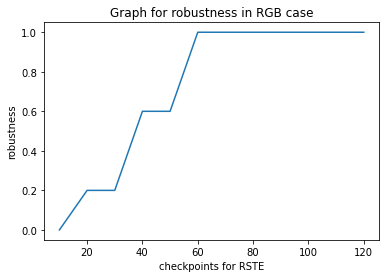

In [ ]:
import matplotlib.pyplot as plt 

x = [10,20,30,40,50,60,70,80,90,100,110,120] 

y = [0,0.2,0.2,0.6,0.6,1,1,1,1,1,1,1] 
 
plt.plot(x, y) 

plt.xlabel('checkpoints for RSTE') 

plt.ylabel('robustness') 

plt.title('Graph for robustness in RGB case') 

plt.show()

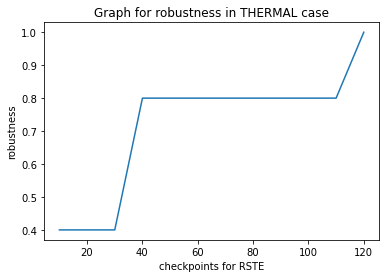

In [ ]:
import matplotlib.pyplot as plt 

x = [10,20,30,40,50,60,70,80,90,100,110,120] 

y = [0.4,0.4,0.4,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,1] 
 
plt.plot(x, y) 

plt.xlabel('checkpoints for RSTE') 

plt.ylabel('robustness') 

plt.title('Graph for robustness in THERMAL case') 

plt.show()

## KCF tracker provides tracking error in case of rgb and thermal both, even after use of legacy

## GOTurn is not working in this version of cv2 even after legacy implementation it's not working

## MOSSE tracker provides tracking eroor in case of rgb and thermal both, even after use of legacy